<a href="https://colab.research.google.com/github/souadkhailia/Hypothesis-Testing-with-Insurance-Data./blob/main/Hypothesis_Testing_with_Insurance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing with Insurance Data

## Overview

This repository contains the code and documentation for a practice assignment on hypothesis testing using the US Health Insurance Dataset. The project aims to answer specific questions through hypothesis testing, providing a practical application of statistical analysis.


In [1]:
## import the standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## import hypothesis testing functions
from scipy import stats

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load in the insurance.csv in the data folder and display preview

# Load in the data
df = pd.read_csv("/content/drive/MyDrive/data/insurance.csv")
display(df.head())
df.info()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Do smokers have higher insurance charges than non-smokers?

- State the Hypothesis & Null Hypothesis
 - Null Hypothesis (H0): There is no difference in charges for smokers vs. nonsmokers
 - Alternative Hypothesis (H1): There is a difference in charges for smokers vs. non
 - Alpha: 0.05

##Selecting the Correct Hypothesis Test

Based upon the Choosing the Right Hypothesis Test workflow from the LP:

- What type of data? Numeric/Categorical?
  - Numeric (insurance charges)
- What type of comparison?
  - 2 groups/samples
- Therefore the correct test is:

 - 2-sample t-test, A.K.A. an independent t-test.
- Assumptions of 2-sample T-Test:

 - No significant outliers
 - Normality
 - Equal Variance

In [4]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
# filter into groups based on smokers or not
smokers = df.loc[df['smoker'] == 'yes'].copy()
non = df.loc[df['smoker'] == 'no'].copy()

In [7]:
smokers_charge = smokers['charges']
non_charge = non['charges']

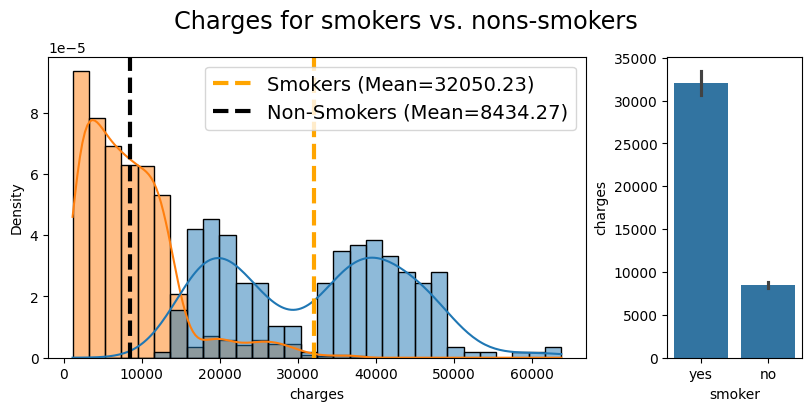

In [8]:
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (8,4), ncols=2,
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax.axvline(np.mean(smokers_charge), ls='--',lw=3,
           label=f"Smokers (Mean={np.mean(smokers_charge):.2f})",color='orange')

ax.axvline(np.mean(non_charge), ls='--', lw=3,
           label=f"Non-Smokers (Mean={np.mean(non_charge):.2f})",color='black')

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar)
fig.suptitle('Charges for smokers vs. nons-smokers',fontsize='xx-large');

##Check Test Assumptions

In [9]:
# Find and remove outliers for smokers
zscores= stats.zscore(smokers_charge)
outliers = abs(zscores)>3
np.sum(outliers)

0

No Outliers

In [10]:
# Find and remove outliers for non smokers
zscores= stats.zscore(non_charge)
outliers = abs(zscores)>3
np.sum(outliers)

24

In [11]:
# Removing outliers from non smokers
non_charge = non_charge[~outliers]
non_charge

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

## Test for normality (or skip)

 - We can skip this step since both groups are greater than n = 15)

## Equal Variance

In [12]:
# Test for variance
result = stats.levene(smokers_charge, non_charge)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

In [13]:
result.pvalue<.05

True

- The null hypothesis of the Levene's test is that the samples DO have equal variance.

 - Therefore, our significant p-value indicates that we do NOT have equal varaince.
- Therefore, we will run the Welch's t-test instead of the default (for scipy's ttest_ind change the equal_var argument to False)

## Final Test

In [14]:
# Since not equal variances, set equal_var = False
result = stats.ttest_ind(smokers_charge, non_charge, equal_var = False)
result

TtestResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104, df=301.26189518807416)

In [15]:
result.pvalue<.05

True

- Our Welch's T-Test return a p-value < .05 therefore we can reject the null hypothesis and support the alternative hypothesis that there is a significant difference in insurance charges for smokers vs. non-smokers.

- In order to know if they are have higher or lower charges, we look at the actual means of our final groups.

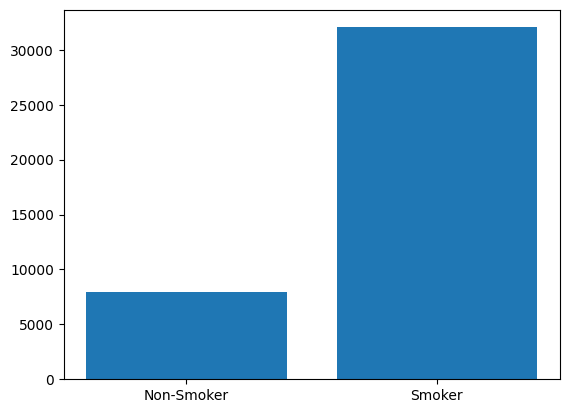

In [16]:
plt.bar(['Non-Smoker','Smoker'],[non_charge.mean(), smokers_charge.mean()]);

# Are men more likely to smoke than women?

###State the Hypothesis & Null Hypothesis
- Null Hypothesis (H0):Men and women are equally likely to be smokers.

- Alternative Hypothesis (HA): Men or women are more likely to be smokers.

- Selecting the Correct Hypothesis Test
Based upon the Choosing

the Right Hypothesis Test workflow from the LP:

- What type of data? Numeric/Categorical?
 - Categorical (Member of smoker/non-smoker)
- What type of comparison?
 - 2 groups/samples (Males vs Females)
- Therefore the correct test is:
 - Chi-Squared Contingency Test

##Assumptions of Chi-Square Test:

- There are two categorical variables (ordinal or nominal)
- The outcomes are independent.

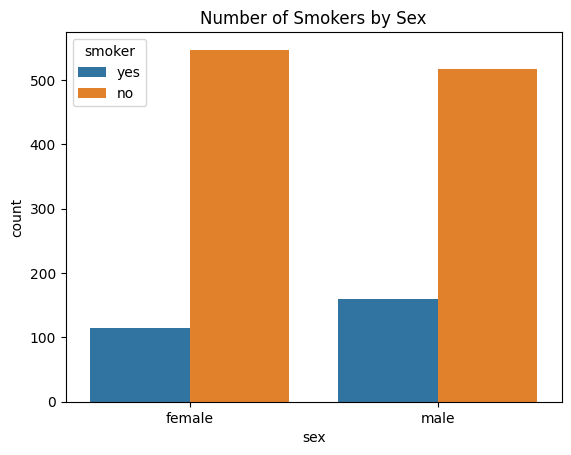

In [17]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [18]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [19]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [20]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

Our p-value is < our alpha of .05, so we reject the null hypothesis that men and women are equally liklely to be smokers.

We must examine the % of males vs. females who smoke to confirm if males smoke more or less.

<Axes: xlabel='sex', ylabel='Probability'>

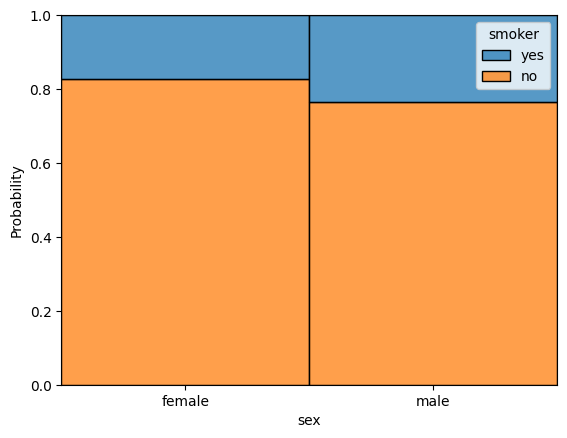

In [21]:
sns.histplot(data=df, x='sex', hue='smoker', stat='probability',
            multiple='fill')

Men are signficantly more likely to be smokers than women.

# Do different regions have different charges, on average?

#State the Hypothesis & Null Hypothesis
- Null Hypothesis (H0): Insurance charges are the same across regions.

- Alternative Hypothesis (HA): Insurance charges are different across regions.

## Selecting the Correct Hypothesis Test

<Axes: xlabel='region', ylabel='charges'>

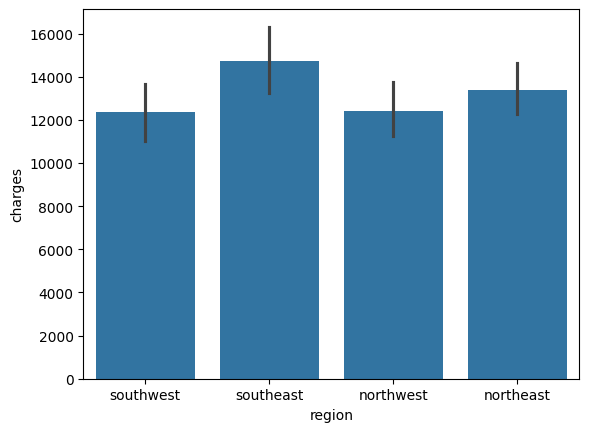

In [22]:
sns.barplot(data = df, x = 'region', y  = 'charges')

#Based upon the Choosing the Right Hypothesis Test workflow from the LP:

-What type of data? Numeric/Categorical?

Numeric (Charges)

- What type of comparison?

-More than 2 groups/samples (4 groups)

##Therefore the correct test is:

####ANOVA

- Assumptions of ANOVA:

 - No significant outliers
 - Equal variance
 - Normality

### Testing ANOVA Assumptions

In [23]:
# Create groups dictionary.
groups = {}

## Loop through all unique categories
for region in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==region,'charges'].copy()

    # save into the dictionary
    groups[region] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [24]:
## Loop through groups
groups_clean = {}

for group, data in groups.items():

    ## Get series for group and rename
    outliers = np.abs(stats.zscore(data))>3
    n_outliers = np.sum(outliers)

    print(f"- For {group}, there were {n_outliers} outliers removed.")
    clean_data = data[~outliers]

    # save into the clean dictionary
    groups_clean[group] = clean_data

groups_clean.keys()

- For southwest, there were 8 outliers removed.
- For southeast, there were 2 outliers removed.
- For northwest, there were 7 outliers removed.
- For northeast, there were 4 outliers removed.


dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

### Normality

In [25]:
# Running normal test on each group and confirming there are >20 in each group
norm_results = []
for group, data in groups_clean.items():

    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results.append({'group':group, 'n': len(data),
                         'p':p, 'test stat':stat, 'sig?':p<.05})
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results)
norm_results_df

,group,n,p,test stat,sig?
0,southwest,317,7.728611e-22,97.223886,True
1,southeast,362,1.936990e-13,58.544942,True
2,northwest,318,2.940543e-19,85.341045,True
3,northeast,320,3.557877e-17,75.749565,True


None of the groups are normally disributed, BUT our groups are greater than n =15 so we can safely disregard the assumption of normality.

### Testing Assumption of Equal Variance

In [26]:
# with the * operator
res = stats.levene(*groups_clean.values())
res

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)

In [27]:
res.pvalue<.05

True

- The null hypothesis of the Levene's test is that the samples DO have equal variance.

 - Therefore, our significant p-value indicates that we do NOT have equal varaince.
-Therefore, we will run the Kruskal-Wallis test instead of the ANOVA test.

### Final Hypothesis Test

In [28]:
# Run the kruskal wallis test
res = stats.kruskal(*groups_clean.values())
res

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)

In [29]:
res.pvalue<.05

False

Our p-value is greater than 0.05, so no we fail to reject the null hypothesis.

There are no significant difference between regions.